# Regression Model to Predict Car Emissions
## Eric Ruiz Sanchez
## DSN: 300363902

## References used in this document are as followed: 


 VIF: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python
 
 Show entire dataframe in Jupyter notebooks : https://stackoverflow.com/questions/26873127/show-dataframe-as-table-in-ipython-notebook
 

### 2. Library import and data preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### a. Saved clean data set from Lab01 without index column

In [2]:
df = pd.read_csv('Dataset/Lab01_ERu63902_cleaned.csv') #Load clean data set from Lab01 
print(df.info()) #check for info and shape of db
df.head() #Print first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          6444 non-null   object 
 1   model         6444 non-null   object 
 2   type          6444 non-null   object 
 3   transmission  6444 non-null   object 
 4   fuel          6444 non-null   object 
 5   fuel_city     6444 non-null   float64
 6   fuel_hwy      6444 non-null   float64
 7   fuel_comb     6444 non-null   float64
 8   emissions     6444 non-null   float64
 9   engine(l)     6444 non-null   float64
 10  cylinder      6444 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 553.9+ KB
None


,make,model,type,transmission,fuel,fuel_city,fuel_hwy,fuel_comb,emissions,engine(l),cylinder
0,mazda,mx_5,two_seater,automatic_shift,z,9.0,6.6,7.9,186.0,2.0,4
1,dodge,charger_ffv,full_size,automatic,e,17.1,10.6,14.0,234.0,3.6,6
2,mercedes_benz,maybach_s_650,full_size,automatic,z,18.4,11.1,15.1,355.0,6.0,12
3,infiniti,qx60_hybrid_awd,suv,continuously_variable,x,8.9,8.4,8.7,200.0,2.5,4
4,jeep,patriot_4x4_trail_rated,suv,continuously_variable,x,11.7,10.3,11.1,255.0,2.4,4


#### b. Remove/drop any remaining null values in the dataset

In [3]:
df.dropna(inplace=True) # Drop any nulls there might have been just in case
df.isna().sum() #check for nulls by column

make            0
model           0
type            0
transmission    0
fuel            0
fuel_city       0
fuel_hwy        0
fuel_comb       0
emissions       0
engine(l)       0
cylinder        0
dtype: int64

#### c. Number of unique values in the model

In [4]:
df.model.value_counts() #Check for unique values in column 'model'

van_wagon        159
mustang           35
f_150_ffv_4x4     32
f_150_ffv         32
silverado_4wd     30
                ... 
xc90_awd           1
escape_hybrid      1
crosstour_awd      1
sq5_quattro        1
s7_quattro         1
Name: model, Length: 1308, dtype: int64

-> Too many values makes it difficult to process so column model is dropped

In [5]:
df.drop('model', axis =1, inplace=True) #Drop 'model' column
df

,make,type,transmission,fuel,fuel_city,fuel_hwy,fuel_comb,emissions,engine(l),cylinder
0,mazda,two_seater,automatic_shift,z,9.0,6.6,7.9,186.0,2.0,4
1,dodge,full_size,automatic,e,17.1,10.6,14.0,234.0,3.6,6
2,mercedes_benz,full_size,automatic,z,18.4,11.1,15.1,355.0,6.0,12
3,infiniti,suv,continuously_variable,x,8.9,8.4,8.7,200.0,2.5,4
4,jeep,suv,continuously_variable,x,11.7,10.3,11.1,255.0,2.4,4
...,...,...,...,...,...,...,...,...,...,...
6439,mercedes_benz,two_seater,automatic,z,13.5,9.6,11.8,275.0,4.7,8
6440,gmc,suv,automatic,x,15.4,10.8,13.3,312.0,5.3,8
6441,ford,compact,automatic,x,12.5,8.2,10.4,244.0,3.7,6
6442,ford,pickup,automatic_shift,e,20.3,14.0,17.4,288.0,5.0,8


### 3. Exploratory Data Analysis

In [6]:
df.describe() #Summary statistics of the dataset

,fuel_city,fuel_hwy,fuel_comb,emissions,engine(l),cylinder
count,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000
mean,12.354904,8.943886,10.804221,246.963222,3.104609,5.489758
std,3.347067,2.195539,2.792541,55.317144,1.302356,1.637122
min,4.200000,4.000000,4.100000,96.000000,1.000000,3.000000
25%,10.000000,7.400000,8.800000,207.000000,2.000000,4.000000
50%,11.900000,8.600000,10.400000,243.000000,3.000000,6.000000
75%,14.300000,10.100000,12.400000,284.000000,3.600000,6.000000
max,30.600000,20.600000,26.100000,488.000000,8.400000,12.000000


In [7]:
df.corr() #Correlation of columns in dataset

,fuel_city,fuel_hwy,fuel_comb,emissions,engine(l),cylinder
fuel_city,1.000000,0.948711,0.993294,0.913059,0.821609,0.788174
fuel_hwy,0.948711,1.000000,0.977643,0.881275,0.750579,0.707395
fuel_comb,0.993294,0.977643,1.000000,0.912697,0.805807,0.768531
emissions,0.913059,0.881275,0.912697,1.000000,0.840501,0.814715
engine(l),0.821609,0.750579,0.805807,0.840501,1.000000,0.932704
cylinder,0.788174,0.707395,0.768531,0.814715,0.932704,1.000000


In [8]:
#Heat map for correlations
df.corr().style.background_gradient(cmap='RdYlGn', axis=None)

,fuel_city,fuel_hwy,fuel_comb,emissions,engine(l),cylinder
fuel_city,1.000000,0.948711,0.993294,0.913059,0.821609,0.788174
fuel_hwy,0.948711,1.000000,0.977643,0.881275,0.750579,0.707395
fuel_comb,0.993294,0.977643,1.000000,0.912697,0.805807,0.768531
emissions,0.913059,0.881275,0.912697,1.000000,0.840501,0.814715
engine(l),0.821609,0.750579,0.805807,0.840501,1.000000,0.932704
cylinder,0.788174,0.707395,0.768531,0.814715,0.932704,1.000000


In [9]:
df_numerical = df.select_dtypes(include=[float, int]) #Get all columns which include numercial values, either floats or ints
df_numerical

,fuel_city,fuel_hwy,fuel_comb,emissions,engine(l),cylinder
0,9.0,6.6,7.9,186.0,2.0,4
1,17.1,10.6,14.0,234.0,3.6,6
2,18.4,11.1,15.1,355.0,6.0,12
3,8.9,8.4,8.7,200.0,2.5,4
4,11.7,10.3,11.1,255.0,2.4,4
...,...,...,...,...,...,...
6439,13.5,9.6,11.8,275.0,4.7,8
6440,15.4,10.8,13.3,312.0,5.3,8
6441,12.5,8.2,10.4,244.0,3.7,6
6442,20.3,14.0,17.4,288.0,5.0,8


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#Calculation for Variance Influence Factor (VIF) for numerical columns of dataframe
pd.Series([variance_inflation_factor(df_numerical.values, i) 
               for i in range(df_numerical.shape[1])], 
              index=df_numerical.columns)


fuel_city     7221.966383
fuel_hwy      2593.215408
fuel_comb    17691.969706
emissions      125.318252
engine(l)       42.207210
cylinder        79.639665
dtype: float64

-> Based on the results obtained above the VIF is to high, data will be rescaled using the standar scaler

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() 
scaled_features = ss.fit_transform(df_numerical) #Scale the numerical data frame using standar scaler

scaled_numerical = pd.DataFrame(scaled_features, columns=df_numerical.columns)
print(scaled_numerical)

#VIF again but for standard scaled dataframe
pd.Series([variance_inflation_factor(scaled_numerical.values, i) 
               for i in range(scaled_numerical.shape[1])], 
              index=scaled_numerical.columns)

      fuel_city  fuel_hwy  fuel_comb  emissions  engine(l)  cylinder
0     -1.002419 -1.067650  -1.040073  -1.102153  -0.848228 -0.910057
1      1.417798  0.754367   1.144487  -0.234362   0.380410  0.311694
2      1.806228  0.982120   1.538424   1.953195   2.223367  3.976947
3     -1.032298 -0.247742  -0.753573  -0.849047  -0.464278 -0.910057
4     -0.195680  0.617716   0.105926   0.145297  -0.541068 -0.910057
...         ...       ...        ...        ...        ...       ...
6439   0.342146  0.298863   0.356613   0.506876   1.225099  1.533445
6440   0.909851  0.845468   0.893800   1.175799   1.685838  1.533445
6441   0.043354 -0.338843  -0.144761  -0.053572   0.457200  0.311694
6442   2.373933  2.303083   2.362111   0.741903   1.455469  1.533445
6443   1.776348  1.483175   1.717487   2.097827   2.530527  1.533445

[6444 rows x 6 columns]


fuel_city     493.966581
fuel_hwy      148.316080
fuel_comb    1108.034622
emissions       7.545789
engine(l)       9.275746
cylinder        8.096618
dtype: float64

-> Based on results and that there seems to be colinearity between fuel columns, columns 'fuel_comb' and 'fuel_city' will be dropped since they have the highest VIF of all colinear values

In [12]:
#Drop column fuel_comb
df.drop(['fuel_comb', 'fuel_city'], axis =1, inplace=True) #Drop 'fuel_comb' and 'fuel_city' column

#### d) Univariate Analysis

Text(0.5, 0, 'Number of Cylinders')

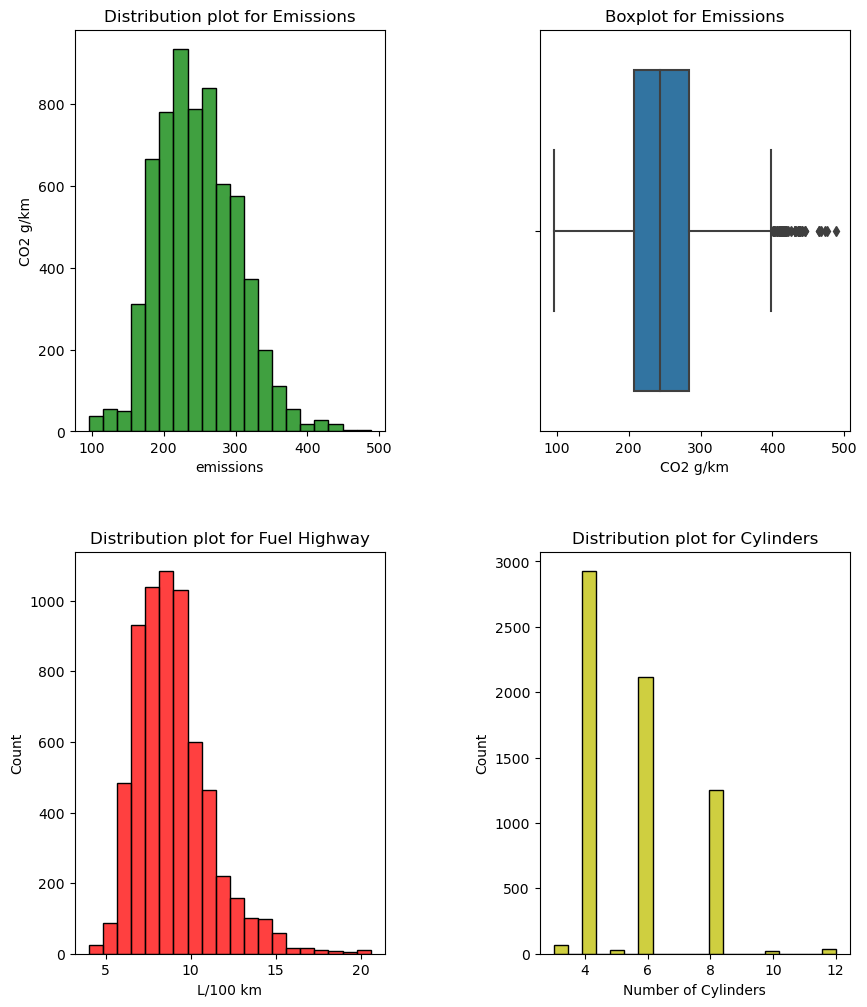

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,12)) #Create the figure for all the subplots
ax1 = fig.add_subplot(221) #Give each subplot a set within the grid
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

#Create the subplots
sns.histplot(df['emissions'], color='g', bins=20, ax= ax1) 
sns.boxplot(x=df['emissions'], ax=ax2)
sns.histplot(df['fuel_hwy'], color = 'r', bins = 20, ax=ax3)
sns.histplot(df['cylinder'], color = 'y', bins = 20, ax=ax4)

#General subplot spacing
plt.subplots_adjust(wspace=0.5, hspace=0.3)

#Individual subplot labels and format
ax1.set_title("Distribution plot for Emissions")
ax1.set_ylabel("CO2 g/km")

ax2.set_title("Boxplot for Emissions")
ax2.set_xlabel("CO2 g/km")

ax3.set_title("Distribution plot for Fuel Highway")
ax3.set_xlabel("L/100 km")

ax4.set_title("Distribution plot for Cylinders")
ax4.set_xlabel("Number of Cylinders")

1. Observations on Distribution and boxplot graphs: 
    - (Distribution) The overall shape of the graph seems to be symmetrical
    - (Distribution) The grand majority of emissions seems to be concentrated towards the middle of the graph at around the 225 g/km of CO2
    - (Distribution) There seems to be very few values that are very high in the emisions distribution plot (near 500 g/km) perhaps this are outliers since they are the maximum values and might tend to be messing with the symmetry of the plot
    - (Boxplot) The median for emissions seems to be aproximately 250 g/km of CO2, there seem to be some considerable datapoints past the 75 percentile which might mess with the overall normal symmetry of the emissions data
    
    
2. Observations on distribution plot of column 'fuel_hwy' 
    - The shape of the graph seems to be right skewed
    - There seem to be outliers towards the end of the graph, this might be worth removing to make the graph follow a normal distribution 


3. Observations on distribution plot of column 'cylinder'  
    - This graph seems to be right skewed
    - Most of the cylinders seem to be accumulating at 4 cylinders followed by 6 and 8. 
    - Very few are in the 12 or 10 cylinders
    - Most cylinders are multiples of 2 however there seem to be a few with 3 or 5 cylinders wich seem to be very scarce

#### e) Multivariate Analysis

[Text(0.5, 1.0, 'Emissions vs Highway Fuel'),
 Text(0.5, 0, 'Emissions CO2 [g/km]'),
 Text(0, 0.5, 'Highway Fuel [L/100km]')]

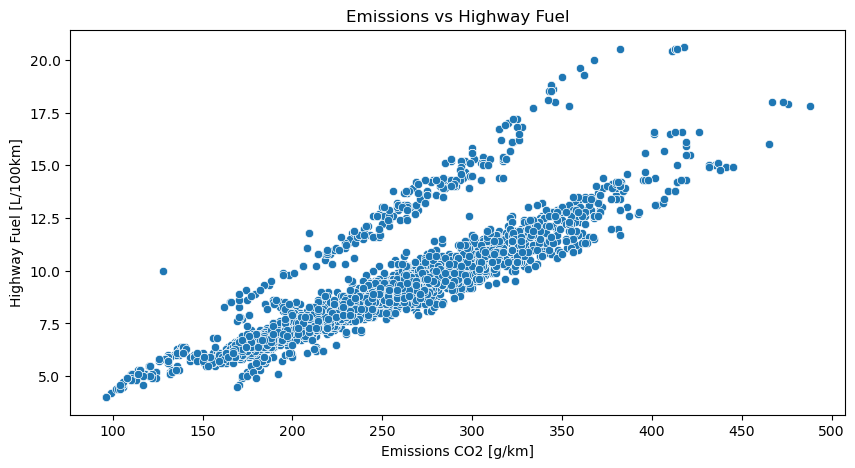

In [14]:
fig = plt.figure(figsize=(10,5))

#Scatter plot for Emissions vs Highway fuel
sns.scatterplot(x=df.emissions, y=df.fuel_hwy).set(title= "Emissions vs Highway Fuel", xlabel = "Emissions CO2 [g/km]", ylabel= "Highway Fuel [L/100km]")

1. Observations on scatter plot for Emissions vs Highway Fuel

    - The plot seems to follow a linear tendency. Most of the points seem to follow a defined linear pattern and there seems to be very few outliers if any. 
    - Most datapoints are clustered towards the middle of the graph
    - There seem to be a positive direct relationship between Emissions and Highway Fuel

<AxesSubplot:xlabel='emissions', ylabel='cylinder'>

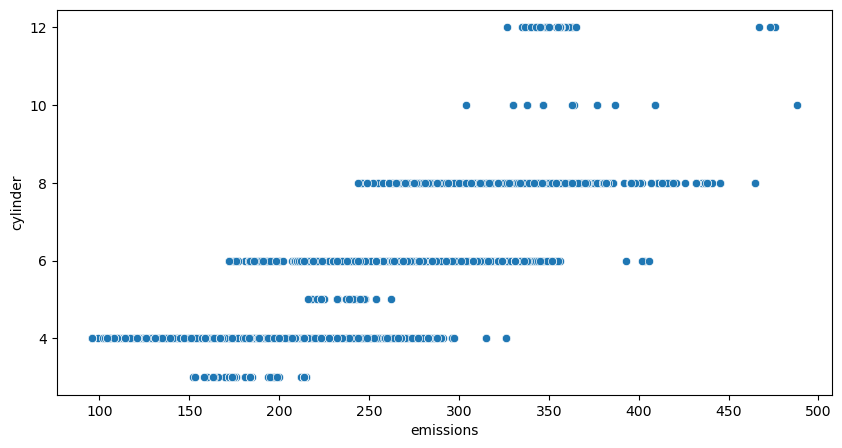

In [15]:
fig = plt.figure(figsize=(10,5))

#Scatter plot for Emissions vs Cylinder
sns.scatterplot(x=df.emissions, y=df.cylinder)

2. Observations on scatter plot for Emissions vs Cylinder
    
    - The graph clearly shows the 7 unique values for cylinder number (7 different values: 3, 4, 5, 6, 8, 10, 12)
    - Seems to be that the more cylinders the higher emissions which means a positive direct relationship in general
    - Most data is in the 4, 6 and 8 cylinders which seem to be the most popular cylinder types by far

#### f) Feature Observation and Hypothesis
    
    - There seem to be positive relationships with the features available
    - I believe there will be a very high chance that the more features the vehicle has the higher the emissions will be
    - It will be interesting to see how the transmission will affect the emissions prediction
    - The model might be better at predicting emissions for the most common types of cylinder best as there is way less data for the other cylinders

### 4. Data Transformation (dummy features)

We need to transform the categorical column into dummy features and join them with the original dataframe. A function is created in a separate Jupyter file to do so. 

In [16]:
%run functions/Functions_ERu63902.ipynb #run the functions python notebook

In [17]:
#function to create dummmies for each categorical value
dummy_df = make_dummies(df)
dummy_df

,fuel_hwy,emissions,engine(l),cylinder,bmw,buick,cadillac,chevrolet,dodge,ford,...,suv,two_seater,van_wagon,automatic,automatic_shift,continuously_variable,manual,e,x,z
0,6.6,186.0,2.0,4,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,10.6,234.0,3.6,6,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,11.1,355.0,6.0,12,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,8.4,200.0,2.5,4,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,10.3,255.0,2.4,4,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,9.6,275.0,4.7,8,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6440,10.8,312.0,5.3,8,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
6441,8.2,244.0,3.7,6,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
6442,14.0,288.0,5.0,8,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


### 5. Feature Selection

#### a. Emissions column is assigned to a new variable target

In [18]:
target = df.emissions #set the emissions feature as the target
df2 = dummy_df.copy()
df2

,fuel_hwy,emissions,engine(l),cylinder,bmw,buick,cadillac,chevrolet,dodge,ford,...,suv,two_seater,van_wagon,automatic,automatic_shift,continuously_variable,manual,e,x,z
0,6.6,186.0,2.0,4,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,10.6,234.0,3.6,6,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,11.1,355.0,6.0,12,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,8.4,200.0,2.5,4,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,10.3,255.0,2.4,4,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,9.6,275.0,4.7,8,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6440,10.8,312.0,5.3,8,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
6441,8.2,244.0,3.7,6,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
6442,14.0,288.0,5.0,8,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


#### b. Correlation Based Selection (manual)

In [19]:
df2.corr().abs().sort_values(by='emissions', ascending=False).loc[:, 'emissions'] #Calculate the correlations for the whole dataframe

emissions                1.000000
fuel_hwy                 0.881275
engine(l)                0.840501
cylinder                 0.814715
continuously_variable    0.331958
automatic                0.330700
pickup                   0.287271
mid_size                 0.229983
gmc                      0.221707
x                        0.221108
honda                    0.190131
z                        0.181657
mini                     0.164669
mazda                    0.163320
suv                      0.153937
manual                   0.145785
mercedes_benz            0.145048
hyundai                  0.126396
e                        0.123420
volkswagen               0.120805
kia                      0.113884
dodge                    0.105887
chevrolet                0.099995
toyota                   0.094668
ford                     0.083323
subaru                   0.079072
two_seater               0.073540
jaguar                   0.060651
cadillac                 0.054147
porsche       

-> Based on the data, I did a manual selection since I don't want to include the next feature which is gmc since I don't want brand to interfere with my analysis

In [20]:
#Manual selection for the correlation features
df_correlation = df2[['fuel_hwy',
                      'engine(l)',
                      'cylinder',
                      'continuously_variable', 
                      'automatic',
                      'pickup', 
                      'mid_size']]
df_correlation

,fuel_hwy,engine(l),cylinder,continuously_variable,automatic,pickup,mid_size
0,6.6,2.0,4,0,0,0,0
1,10.6,3.6,6,0,1,0,0
2,11.1,6.0,12,0,1,0,0
3,8.4,2.5,4,1,0,0,0
4,10.3,2.4,4,1,0,0,0
...,...,...,...,...,...,...,...
6439,9.6,4.7,8,0,1,0,0
6440,10.8,5.3,8,0,1,0,0
6441,8.2,3.7,6,0,1,0,0
6442,14.0,5.0,8,0,0,1,0


#### c. Variance Threshold Selection

In [21]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.125) #Set the variance threshold
vt.fit(df2)
vt_select = pd.DataFrame({'Variance': vt.variances_, 'select_status': vt.get_support()}, index=df2.columns).sort_values(by='Variance', ascending=False)
cols = vt.get_support(indices=True) #Get the feature name columns for the variance threshold dataframe
df_vt = df2.iloc[:, cols]
df_vt = df_vt.drop('emissions', axis=1)
df_vt

,fuel_hwy,engine(l),cylinder,mid_size,suv,automatic,automatic_shift,manual,x,z
0,6.6,2.0,4,0,0,0,1,0,0,1
1,10.6,3.6,6,0,0,1,0,0,0,0
2,11.1,6.0,12,0,0,1,0,0,0,1
3,8.4,2.5,4,0,1,0,0,0,1,0
4,10.3,2.4,4,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
6439,9.6,4.7,8,0,0,1,0,0,0,1
6440,10.8,5.3,8,0,1,1,0,0,1,0
6441,8.2,3.7,6,0,0,1,0,0,1,0
6442,14.0,5.0,8,0,0,0,1,0,0,0


#### d. Select K-Best

In [22]:
# Create and fit selector
from sklearn.feature_selection import SelectKBest, f_regression

select = SelectKBest(score_func=f_regression, k=10) #Apply k=10 for 10 features and with f_regression score function
df2 = df2.drop('emissions', axis=1)

select.fit_transform(df2, target) 
cols = select.get_support(indices=True)
df_selKBest = df2.iloc[:,cols] #Get the final dataframe
df_selKBest

,fuel_hwy,engine(l),cylinder,gmc,honda,mid_size,pickup,automatic,continuously_variable,x
0,6.6,2.0,4,0,0,0,0,0,0,0
1,10.6,3.6,6,0,0,0,0,1,0,0
2,11.1,6.0,12,0,0,0,0,1,0,0
3,8.4,2.5,4,0,0,0,0,0,1,1
4,10.3,2.4,4,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
6439,9.6,4.7,8,0,0,0,0,1,0,0
6440,10.8,5.3,8,1,0,0,0,1,0,1
6441,8.2,3.7,6,0,0,0,0,1,0,1
6442,14.0,5.0,8,0,0,0,1,0,0,0


### 6. Linear Regression Models with Feature Selection, Feature transformation and Scaling

In [23]:
#Creation of lists to use within loop
transformation = []
scaling = []
df_list = [df_correlation, df_vt, df_selKBest]
feature_selection = ["Correlation", "Correlation", "Correlation", "Correlation", 
                     "Variance", "Variance", "Variance", "Variance", 
                     "SelectKBest", "SelectKBest", "SelectKBest", "SelectKBest"]
rmse_scores = []
r2_scores = []

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
    
for df in df_list: 
    
    ln = LinearRegression() # Initialize the linear regression method
    iterations = []
    
    #No transformation or scaling
    iterations.append(df)
    transformation.append("None")
    scaling.append("None")
    
    #Transformation
    poly_df = make_poly(df) #Function to run transformation
    iterations.append(poly_df)
    transformation.append("Poly Degree 2")
    scaling.append("None")
    
    #Scaling
    scaled_df = make_scale(df) #Function to run scaling
    iterations.append(scaled_df)
    transformation.append("None")
    scaling.append("Standard Scaled")
    
    #Transofrmation ans scaling
    scaled_poly_df = make_scale(poly_df)
    iterations.append(scaled_poly_df)
    transformation.append("Poly Degree 2")
    scaling.append("Standard Scaled")
    
    for ite in iterations: 
        
        #Split the dataset into traning and testing data
        X_train, X_test, Y_train, Y_test = train_test_split(ite, target, test_size=0.25, random_state=42)

        ln.fit(X_train, Y_train)
    
        #Make the prediction
        Y_prediction = ln.predict(X_test)
        
        #Calculate R2 score and append
        r2 = ln.score(X_test, Y_test)
        r2_scores.append(r2)
        
        #Calculate RMSE score and append
        rmse = mean_squared_error(Y_test, Y_prediction, squared=False)
        rmse_scores.append(rmse)    

### 7. Linear Regression with Lasso Model

In [25]:
from sklearn.linear_model import Lasso 

#Denote a series of alphas to try
alphas = np.linspace(1, 0.001, 25)
alphas

#split the model again into training and testing
xtrain, xtest, ytrain, ytest = train_test_split(df2, target, test_size=0.25, random_state=42)

rmse_list_lasso = []
r2_list_lasso = []
model_list_lasso = []

#Run a loop for each of the alphas to see which one gets a better score
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=1000)
    lasso.fit(xtrain, ytrain)
    pred = lasso.predict(xtest)
    
    r2_list_lasso.append(lasso.score(xtrain,ytrain))
    rmse_lasso = mean_squared_error(ytest, pred)**0.5;
    rmse_list_lasso.append(rmse_lasso)
    model_list_lasso.append(lasso)

#Get the RMSE scores sorted by minimum RMSE    
lasso_df = pd.DataFrame(zip(alphas, rmse_list_lasso, r2_list_lasso), columns=['Alpha', 'RMSE', "R2"])
lasso_sorted = lasso_df.sort_values(by=['RMSE', 'R2'], ascending=[True, False])
lasso_sorted.head(5)

,Alpha,RMSE,R2
24,0.001000,9.680639,0.970035
23,0.042625,9.785476,0.968992
22,0.084250,10.074380,0.967015
21,0.125875,10.491145,0.964244
20,0.167500,10.937592,0.961258


### 8. Plot and Summary Analysis

In [26]:
#Create table and add scores of linear models
scores_table = pd.DataFrame(data= {'Feature_Selection': feature_selection, 
                                   'Transformation':transformation, 
                                   'Scaling': scaling, 
                                  'R2': r2_scores, 
                                  'RMSE': rmse_scores})

lasso_alpha_str = "Lasso Alpha= " + str(lasso_sorted.Alpha.iloc[0])

#Add Lasso
scores_table = scores_table.append({'Feature_Selection': lasso_alpha_str, 
                                   'Transformation':"None", 
                                   'Scaling': "None", 
                                  'R2': lasso_sorted.R2.iloc[0], 
                                  'RMSE': lasso_sorted.RMSE.iloc[0]}, ignore_index=True)

scores_table

/var/folders/bw/smw5hx5n5xsbdvmk6_2k3jv00000gn/T/ipykernel_23041/3110799628.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_table = scores_table.append({'Feature_Selection': lasso_alpha_str,


,Feature_Selection,Transformation,Scaling,R2,RMSE
0,Correlation,None,None,0.864690,19.646547
1,Correlation,Poly Degree 2,None,0.912246,15.821803
2,Correlation,None,Standard Scaled,0.864690,19.646547
3,Correlation,Poly Degree 2,Standard Scaled,0.912227,15.823483
4,Variance,None,None,0.894160,17.375880
5,Variance,Poly Degree 2,None,0.956029,11.199613
6,Variance,None,Standard Scaled,0.894160,17.375880
7,Variance,Poly Degree 2,Standard Scaled,0.955984,11.205403
8,SelectKBest,None,None,0.865957,19.554348
9,SelectKBest,Poly Degree 2,None,0.931590,13.969517


-> Based on the above table, I believe the best model to be index 12: 
 - **Feature Selection: "Lasso Alpha = 0.001"**
 - **Transformation : "None"**
 - **Scaling : "None"** 
 
Since It has the highest R2 and the lowest RMSE

Text(0.5, 1.0, 'Lasso Regression Model')

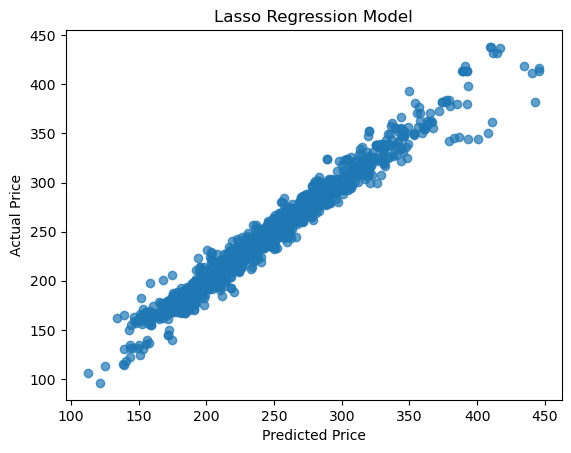

In [27]:
#Create Scatter plot to compare actual vs. predicted

lasso = Lasso(alpha=lasso_sorted.Alpha.iloc[0], max_iter=1000)
lasso.fit(xtrain, ytrain)   
pred = lasso.predict(xtest)

plt.scatter(pred, ytest, alpha=0.7)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso Regression Model')

In [28]:
#Coeficients for the lasso model
best_model = model_list_lasso[24]
print(pd.Series(best_model.coef_, index=df2.columns))

fuel_hwy                  23.134850
engine(l)                  5.853131
cylinder                   2.589027
bmw                       -3.796021
buick                     -1.227438
cadillac                  -2.027609
chevrolet                 -3.077882
dodge                      2.696582
ford                      -0.611407
gmc                       -3.863171
honda                     -4.628698
hyundai                   -8.917734
infiniti                 -11.172636
jaguar                    -4.639929
jeep                      -3.910529
kia                       -7.843587
lexus                    -13.830037
mazda                    -12.869514
mercedes_benz            -10.014685
mini                      -9.998821
nissan                    -1.252732
porsche                   -7.624928
subaru                     0.154971
toyota                   -12.505040
volkswagen                -5.177097
volvo                     -1.712961
full_size                  4.745194
mid_size                   1

The coefficients are very extensive since we are using the lasso aproach for the predictions

Findings on the linear model: 

- I believe the best linear model which is the Lasso regression model has a high accuracy and score for rmse and r2 values because the features used in this dataset follow various iterations that find the best alpha. Additionally, this method utilizes the most features out of all the datasets used and I believe that plays a high part into the prediction since it has more information to make a model. 
 
- I believe the disadvantage is that there are more coefficients needed to use this model and since the other models use less coefficients and have a variant with a high accuracy as well then it seems that perhaps in real life the less features used with the most accuracy would be the best answer for the linear regression. 
 
- The linear regression scatter plot seems to have a clear positive linear relationship and the values predicted are very similar or on par with the test values inputted into the model.


### 9. Out of Sample Prediction

In [29]:
from IPython.display import display, HTML

synthetic = df2.describe().loc[['25%', '50%'], :]
synthetic = synthetic.astype("int")

display(HTML(synthetic.to_html())) #To print the whole table columns; everything makes sense

X_train, X_test, Y_train, Y_test = train_test_split(df2, target, test_size=0.25, random_state=42)

lasso = Lasso(alpha=lasso_sorted.Alpha.iloc[0], max_iter=1000)
lasso.fit(X_train, Y_train)

    
#Make the prediction for synthetic
pred = lasso.predict(synthetic)


,fuel_hwy,engine(l),cylinder,bmw,buick,cadillac,chevrolet,dodge,ford,gmc,honda,hyundai,infiniti,jaguar,jeep,kia,lexus,mazda,mercedes_benz,mini,nissan,porsche,subaru,toyota,volkswagen,volvo,full_size,mid_size,other,pickup,suv,two_seater,van_wagon,automatic,automatic_shift,continuously_variable,manual,e,x,z
25%,7,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50%,8,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


The prediction made is congruent with the linear model presented previously. No strange or negative values were obtained, since there is no real data with the same values there is no way to know if the prediction is  correct or not since there is nothing to compare it to

### 10. Negative Value

In [30]:
print("The minimum predicted value is: " , pred.min())

The minimum predicted value is:  225.24847143586456


There is no negative prediction on the synthetic dataset with the selected model and the emissions predicted seem congruent with previous findings

In [31]:
#Create a dataframe with data that would give a negative prediction
negatives = pd.DataFrame(columns= df2.columns)

negatives.loc[len(negatives.index)] = np.linspace(1, 1, negatives.shape[1], dtype=np.int64)

negatives

print("The predicted value is: " , lasso.predict(negatives)[0])

The predicted value is:  -242.34533516914652


Based on the coeficients of the selected model there are some features tat could prompt a negative value. A prediction that gives out a negative value can be found oversizing these values however the values here will obviosuly incorrect, this is just to demonstrate a negative value can be obtained.

However, one would expect a combination of these values would not be found in the dataset given that it is impossible to have this combination unless the data was inputed with an error. 